In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
data=np.linspace(1,50,500)
y=np.sin(data)

In [3]:
df=pd.DataFrame(data=y,index=data,columns=["Sin"])

In [4]:
df

,Sin
1.000000,0.841471
1.098196,0.890388
1.196393,0.930726
1.294589,0.962097
1.392786,0.984198
...,...
49.607214,-0.611748
49.705411,-0.531247
49.803607,-0.445628
49.901804,-0.355715


In [5]:
len(df)

500

In [6]:
test_per=len(df)*0.1
test_per

50.0

In [7]:
train_set=df.iloc[:-int(test_per)]

In [8]:
train_set

,Sin
1.000000,0.841471
1.098196,0.890388
1.196393,0.930726
1.294589,0.962097
1.392786,0.984198
...,...
44.697395,0.655691
44.795591,0.726554
44.893788,0.790418
44.991984,0.846665


In [9]:
test_set=df.iloc[-int(test_per):]

In [10]:
test_set

,Sin
45.188377,0.934225
45.286573,0.964693
45.384770,0.985867
45.482966,0.997542
45.581162,0.999606
45.679359,0.992039
45.777555,0.974914
45.875752,0.948396
45.973948,0.912740
46.072144,0.868290


In [11]:
#As we know in RNN we give output from previos cell to next cell , so we should also scale the y in RNN 

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler=MinMaxScaler()
scaler.fit(train_set)

MinMaxScaler()

In [14]:
scaled_train=scaler.transform(train_set)
scaled_test=scaler.transform(test_set)

In [15]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
length=49
batch_size=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)
len(generator)

401

In [17]:
val_generator=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=batch_size)

In [18]:
n_features=1
model=Sequential()
model.add(SimpleRNN(49,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [19]:
early=EarlyStopping(monitor="val_loss",patience=2)

In [20]:
model.fit(generator,epochs=20,validation_data=val_generator,callbacks=[early]);

Epoch 1/20
401/401 [==============================] - 4s 9ms/step - loss: 0.0061 - val_loss: 1.6091e-07
Epoch 2/20
401/401 [==============================] - 4s 11ms/step - loss: 0.0012 - val_loss: 2.5679e-05
Epoch 3/20
401/401 [==============================] - 4s 10ms/step - loss: 5.8248e-05 - val_loss: 2.0193e-05


In [21]:
results=pd.DataFrame(model.history.history)
results

,loss,val_loss
0,0.006066,1.609127e-07
1,0.001187,2.567862e-05
2,0.000058,2.019266e-05


<AxesSubplot:>

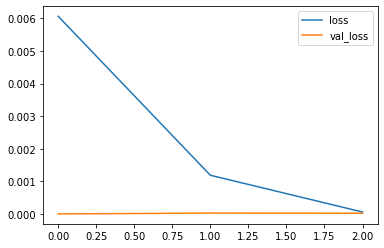

In [22]:
results.plot()

In [23]:
first_Eval_batch=scaled_train[-length:].reshape(1,length,n_features)
first_Eval_batch.shape

(1, 49, 1)

In [24]:
prediction_firs_batch=model.predict(first_Eval_batch)

In [25]:
prediction_firs_batch

array([[0.96372044]], dtype=float32)

In [26]:
#first prediction will be the first item in test data
scaled_test[0]

array([0.96719114])

In [27]:
#now we need to make a for loop to find the next series

In [28]:
all_predictions=[]
eval_batch=scaled_train[-length:].reshape(1,length,n_features)   

for i in range(len(test_set)):
    prediction_curr_batch=model.predict(eval_batch)
    eval_batch= np.append(eval_batch[:,1:,:],[prediction_curr_batch],axis=1)
    all_predictions.append(prediction_curr_batch[0])

In [29]:
all_predictions

[array([0.96372044], dtype=float32),
 array([0.9784847], dtype=float32),
 array([0.98759377], dtype=float32),
 array([0.99263924], dtype=float32),
 array([0.9919779], dtype=float32),
 array([0.9870658], dtype=float32),
 array([0.97750574], dtype=float32),
 array([0.9631778], dtype=float32),
 array([0.9442374], dtype=float32),
 array([0.9205386], dtype=float32),
 array([0.893224], dtype=float32),
 array([0.8620157], dtype=float32),
 array([0.8276959], dtype=float32),
 array([0.79002863], dtype=float32),
 array([0.7496572], dtype=float32),
 array([0.7074169], dtype=float32),
 array([0.6631022], dtype=float32),
 array([0.61760765], dtype=float32),
 array([0.57058555], dtype=float32),
 array([0.5229356], dtype=float32),
 array([0.47514224], dtype=float32),
 array([0.4272022], dtype=float32),
 array([0.37999973], dtype=float32),
 array([0.3334576], dtype=float32),
 array([0.28892225], dtype=float32),
 array([0.24599172], dtype=float32),
 array([0.205947], dtype=float32),
 array([0.16849107]

In [30]:
actual_predictions=scaler.inverse_transform(all_predictions)

In [31]:
test_set["predictions"]=actual_predictions

<ipython-input-31-8474686009f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["predictions"]=actual_predictions


In [32]:
test_set

,Sin,predictions
45.188377,0.934225,0.927285
45.286573,0.964693,0.956808
45.384770,0.985867,0.975023
45.482966,0.997542,0.985112
45.581162,0.999606,0.983790
45.679359,0.992039,0.973967
45.777555,0.974914,0.954850
45.875752,0.948396,0.926200
45.973948,0.912740,0.888325
46.072144,0.868290,0.840936


<AxesSubplot:>

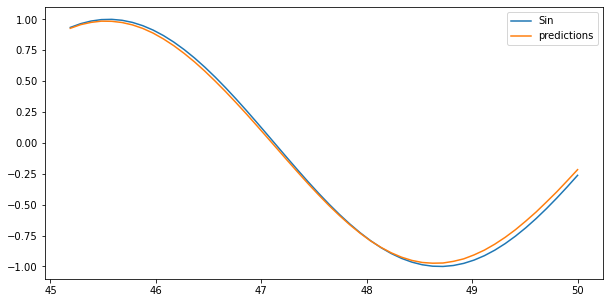

In [33]:
test_set.plot(figsize=(10,5))